In [1]:
import satellite_images_nso.api.nso_georegion as nso

In [2]:
import geopandas as gpd

# Search for satellite images in geojson and download links

In [21]:
# give path to geojson en output,!!!!! rewrite these directories to your file system!!!!
path_geojson = "C:/repos/github/satellite_images_nso/input_data/Kennemerland-Zuid_annotatie_polygon.geojson"
output_path = "C:/repos/github/satellite_images_nso/output"

nso_username = 'micwin'
nso_password = 'REDACTED'

# This method fetches all the download links to all the satelliet images which contain region in the geojson
georegion = nso.nso_georegion(path_geojson,output_path,\
***REMOVED***nso_username,\
                            nso_password)

In [22]:
df_p =  gpd.read_file(path_geojson)

In [24]:
links = georegion.retrieve_download_links()

These are the coordinates:
[[[4.517118702808698, 52.36154373121362], [4.529288907610194, 52.367784861881056], [4.554721515079986, 52.36466429654734], [4.56735980468154, 52.366380607480885], [4.570168313481885, 52.353274233079276], [4.582962631350123, 52.34843735681201], [4.581090292149893, 52.34235225441127], [4.568139946014969, 52.331118219209884], [4.55643782601353, 52.31707567520816], [4.524764087876305, 52.292891293871854], [4.499487508673198, 52.29382746347197], [4.486693190804959, 52.284933852270875], [4.461884696401911, 52.26558634720183], [4.452210943867388, 52.25996932960114], [4.451898887334017, 52.25513245333388], [4.449246406800357, 52.25123174666673], [4.446749954533384, 52.25123174666673], [4.43676414546549, 52.25341614240033], [4.435671947598689, 52.25435231200045], [4.517118702808698, 52.36154373121362]]]


C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Passed check
Passed check
operands could not be broadcast together with shapes (2,20) (2,18) 
{'geometry': {'coordinates': [[[4.882600148, 52.355105751], [4.490497645, 52.35440923], [4.490437168, 52.352611755], [4.487441374, 52.350851272], [4.487350858, 52.348155055], [4.484355491, 52.346394489], [4.482707538, 52.341020467], [4.47971284, 52.339259776], [4.479622832, 52.336563544], [4.47662856, 52.33480277], [4.476538754, 52.332106533], [4.473544907, 52.330345676], [4.473455303, 52.327649433], [4.470461882, 52.325888494], [4.470372479, 52.323192245], [4.467379483, 52.321431224], [4.467290282, 52.318734969], [4.465823668, 52.318753179], [4.464208712, 52.314277604], [4.462742243, 52.314295775], [4.462653347, 52.311599511], [4.459661445, 52.309838283], [4.45957275, 52.307142013], [4.456581273, 52.305380702], [4.456492779, 52.302684427], [4.453501727, 52.300923034], [4.453413434, 52.298226753], [4.450422806, 52.296465277], [4.450334715, 52.29376899], [4.447344511, 52.292007432], [4.44725662

In [25]:
links

['https://api.satellietdataportaal.nl/v1/download/Spot67_RD_8bit_RGB_150cm/20160505_103856_34_Sp6',
 'https://api.satellietdataportaal.nl/v1/download/Spot67_RD_8bit_RGB_150cm/20160908_101953_41_Sp6',
 'https://api.satellietdataportaal.nl/v1/download/Spot67_RD_8bit_RGB_150cm/20160818_103151_17_Sp6',
 'https://api.satellietdataportaal.nl/v1/download/Spot67_RD_8bit_RGB_150cm/20140904_102422_264_Sp6',
 'https://api.satellietdataportaal.nl/v1/download/Tri_RD_8bit_RGB_80cm/3SAT_2_20170825_000FFAVI_005_RD_8bit_RGB_0.8m',
 'https://api.satellietdataportaal.nl/v1/download/Tri_RD_12bit_RGBI_80cm/3SAT_2_20170825_000FFAVI_005_RD_8bit_RGB_0.8m',
 'https://api.satellietdataportaal.nl/v1/download/Tri_RD_12bit_RGBI_320cm/20180927_095154_Tri',
 'https://api.satellietdataportaal.nl/v1/download/Tri_ruw/20180927_095154_Tri',
 'https://api.satellietdataportaal.nl/v1/download/Tri_RD_8bit_RGB_80cm/20180927_095154_Tri',
 'https://api.satellietdataportaal.nl/v1/download/Tri_RD_12bit_RGBI_80cm/20180927_095154_T

# Download, Crop and calculate NDVI for a LandSat Image

### For a specific image

In [15]:
# Downloads a satellite image from the NSO, makes a crop out of it so it fits the geojson region and calculates the NVDI index.
# The output will stored in the designated output folder.

image = links[0]
georegion.execute_link(image)

# The parameters are : execute_link(self, link, delete_zip_file = False,delete_source_files = True, 
# check_if_file_exists = True)

Starting download to: C:/repos/github/satellite_images_nso/output/20180423_094807_Tri_Tri_ruw.zip
Extracting files
Extracted folder is: C:/repos/github/satellite_images_nso/output/20180423_094807_Tri_Tri_ruw
Error in downloading and or cropping: .tif not found


('', '', '')

### For a group of images 

In [11]:
# Loop through and download all 50 cm resolution SuperView Images.
for link in links:
    if 'SV' in link and '50cm' in link and "RGBI" in link:
        print(link)

https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200304_114559_SV1-02
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20190422_111333_SV1-01
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20190308_111642_SV1-01
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20190302_105724_SV1-01
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20210603_111846_SV1-04
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20191130_110719_SV1-01
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20190729_111526_SV1-04
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200731_112001_SV1-03
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200508_110810_SV1-01
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200625_112013_SV1-03
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/

In [14]:
for link in links:
    if '2017' in link and "RGBI":
        print(link)

https://api.satellietdataportaal.nl/v1/download/SV_ruw/20210907_112017_SV1-04
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_200cm/20210907_112017_SV1-04
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20210907_112017_SV1-04
https://api.satellietdataportaal.nl/v1/download/SV_RD_8bit_RGB_50cm/20210907_112017_SV1-04
https://api.satellietdataportaal.nl/v1/download/Tri_RD_8bit_RGB_80cm/3SAT_1_20170710_0010A3VI_006_RD_8bit_RGB_0.8m
https://api.satellietdataportaal.nl/v1/download/Tri_RD_12bit_RGBI_80cm/3SAT_1_20170710_0010A3VI_006_RD_8bit_RGB_0.8m
https://api.satellietdataportaal.nl/v1/download/Tri_RD_8bit_RGB_80cm/3SAT_2_20170825_000FFAVI_005_RD_8bit_RGB_0.8m
https://api.satellietdataportaal.nl/v1/download/Tri_RD_12bit_RGBI_80cm/3SAT_2_20170825_000FFAVI_005_RD_8bit_RGB_0.8m
https://api.satellietdataportaal.nl/v1/download/Tri_ruw/20170515_091817_Tri
https://api.satellietdataportaal.nl/v1/download/Tri_RD_8bit_RGB_80cm/20170515_091817_Tri
https://api.sat

In [10]:
# loop through and download all the 200cm resolution SuperView images
for link in links:
    if 'SV' in link and '50cm' in link and "RGBI" in link:
        print(link)
        try:
            georegion.execute_link(link)
        except Exception as e:
            print(e)

https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200304_114559_SV1-02
Starting download to: C:/repos/github/satellite_images_nso/output/20200304_114559_SV1-02_SV_RD_11bit_RGBI_50cm.zip


C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Error downloading file: 400 Client Error: BAD REQUEST for url: https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200304_114559_SV1-02


SystemExit: 400 Client Error: BAD REQUEST for url: https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200304_114559_SV1-02

In [ ]:
# loop through and download all the 200cm Trisat images
for link in links:
    if 'Tri' in link and "80cm" in link and "8bit" in link:
        try:
            georegion.execute_link(link)
        except Exception as e:
            print(e)

# Normalize LandSat image.

### Multi date relative normalisation.

In [1]:
# Imports the normalisation library.
from satellite_images_nso.__normalisation import normalisation

# Path to a Superview satellite image.
path = "20190401_111723_SV1-04_200cm_RD_11bit_RGBI_DenHaag_solleveld_sweco_cropped.tif"


normalisation.multidate_normalisation_75th_percentile(path)


-------- Multi-date Relative Normalisation for file: 
C:/repos/github/satellite_images_nso/output/20190401_111723_SV1-04_200cm_RD_11bit_RGBI_DenHaag_solleveld_sweco_cropped.tif
Saving file to:
C:/repos/github/satellite_images_nso/output/20190401_111723_SV1-04_200cm_RD_11bit_RGBI_DenHaag_solleveld_sweco_cropped_Spring_normalised.tif


<Figure size 1400x700 with 2 Axes>

### Black spot normalisation.

In [ ]:
from satellite_images_nso.__normalisation import normalisation

In [ ]:
path = "C:/repos/github/satellite_images_nso/data_satellite/20210302_111341_SV1-03_SV_RD_11bit_RGBI_200cm_Brouwersdam_Grevelingen_21_cropped.tif"

Using local coefficients
-------- Dark Spot Normalisation for file: 
C:/repos/github/satellite_images_nso/data_satellite/20210302_111341_SV1-03_SV_RD_11bit_RGBI_200cm_Brouwersdam_Grevelingen_21_cropped.tif
20210302
105 153 91 64
Saving file to:
C:/repos/github/satellite_images_nso/data_satellite/20210302_111341_SV1-03_SV_RD_11bit_RGBI_200cm_Brouwersdam_Grevelingen_21_cropped_dark_point_normalised.tif


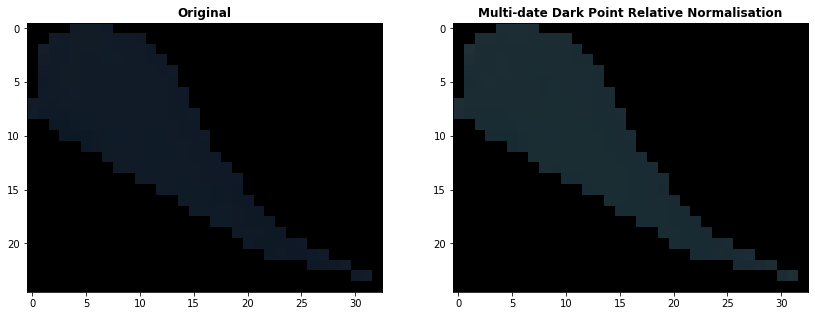

In [8]:
normalisation.multi_date_dark_spot_normalisation(path,"20210302")

# Other functionalities

In [ ]:
# The sat_manipulator gives other handy transmations on satellite data.
import satellite_images_nso.api.sat_manipulator as sat_manipulator

# This function reads a .tif file, which is a format the satellite data is stored in,  and converts it to a pixel based geopandas dataframe.
# For machine learning purposes.
path_to_vector = "path/to/folder/*.tif"
geo_df_pixel = sat_manipulator.tranform_vector_to_pixel_gpdf(path_to_vector)